In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

In [14]:
df = pd.read_csv("./diabetes_prediction_dataset.csv")
df.columns
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.07878751280456157


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

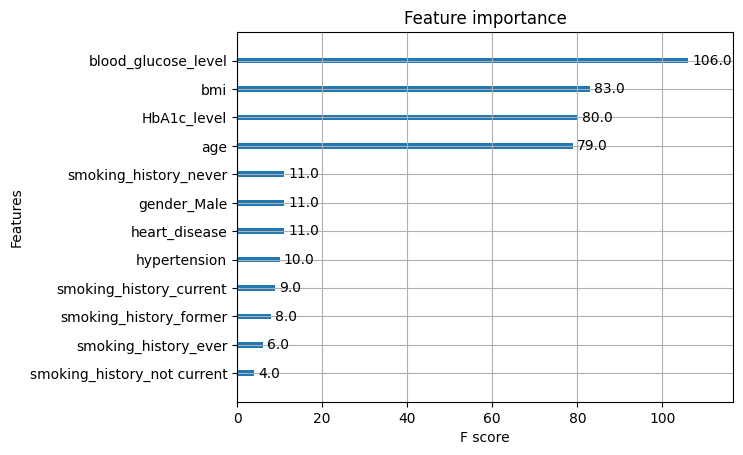

In [25]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=30, seed=42)


model = xgb_model.fit(X_train, y_train)

model.predict(X_test)

print(log_loss(y_test, model.predict_proba(X_test)))

xgb.plot_importance(model)

In [29]:
import pickle
file_name = "xgb.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [30]:
test = pickle.load(open(file_name, "rb"))

test.predict(X_test)

print(log_loss(y_test, test.predict_proba(X_test)))